<a href="https://colab.research.google.com/github/MartinPdeS/PyMieSim/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build latest package version
============================


In [1]:
!python -m pip install PyMieSim --no-cache-dir --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 184.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 143.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 192.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 223.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 195.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 197.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 113.9 MB/s eta 0:00:00


Experiment imports
------------------

In [5]:
from PyMieSim import experiment
import numpy as np
from PyMieSim.experiment.scatterer import Sphere
from PyMieSim.experiment.source import Gaussian
from PyMieSim.experiment.detector import Photodiode
from PyMieSim.experiment import Setup
from PyMieSim.units import nanometer, degree, AU, RIU, watt
from PyOptik import Material

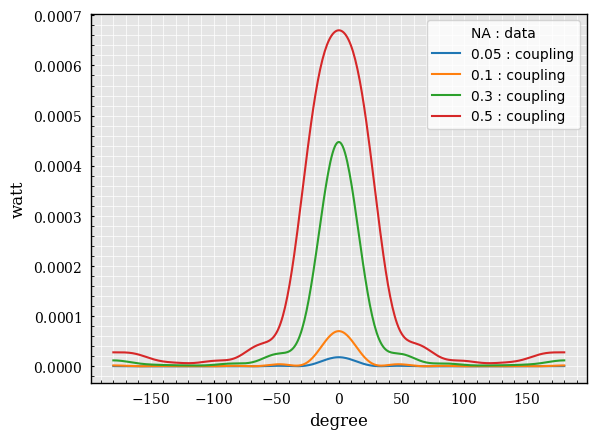

In [11]:
# Defining the source to be employed.
source = Gaussian(
    wavelength=1200 * nanometer,
    polarization=0 * degree,
    optical_power=1e-3 * watt,
    NA=0.2 * AU
)

# Defining the ranging parameters for the scatterer distribution
scatterer = Sphere(
    diameter=2000 * nanometer,
    property=Material.BK7,
    medium_property=1 * RIU,
    source=source
)


# Defining the detector to be employed.
detector = Photodiode(
    NA=[0.5, 0.3, 0.1, 0.05] * AU,
    phi_offset=np.linspace(-180, 180, 400) * degree,
    gamma_offset=0 * degree,
    sampling=400 * AU,
    polarization_filter=None
)

# Defining the experiment setup
experiment = Setup(scatterer=scatterer, source=source, detector=detector)

# Measuring the properties
dataframe = experiment.get('coupling')

# Plotting the results
dataframe.plot_data(x="phi_offset")
